In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
df = pd.read_csv('hourly_dataset.csv')
df.head()

,Unnamed: 0,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8,line_9,...,Cons_5,Cons_6,Cons_7,Cons_8,Cons_9,Cons_10,Cons_11,Cons_12,Cons_13,Cons_14
0,1/1/2007 0:00,166.025221,75.467767,76.646870,57.085825,40.307214,-29.868492,-72.589749,11.313771,14.589647,...,11.750373,-21.811085,0,-39.127425,45.610002,13.914916,5.411356,9.431221,20.872374,23.036916
1,1/1/2007 1:00,162.620836,75.345228,74.995470,57.337157,41.308517,-27.697865,-69.507543,18.542215,15.710432,...,10.368682,-8.628857,0,-23.951319,39.670323,12.341659,4.800786,8.222516,18.057578,20.517481
2,1/1/2007 2:00,161.139853,75.279870,74.372432,57.393964,41.728647,-26.918123,-68.010603,21.848763,16.281967,...,9.791946,-2.980085,0,-17.297519,37.354837,11.681809,4.541437,7.786808,16.939478,19.309935
3,1/1/2007 3:00,160.298553,75.235280,74.140899,57.445065,41.957738,-26.597439,-67.278614,23.602321,16.527256,...,9.427170,0.311170,0,-13.485598,35.864706,11.243585,4.373295,7.485701,16.268544,18.555407
4,1/1/2007 4:00,160.190015,75.234056,74.107200,57.457753,41.993102,-26.545351,-67.185714,23.829029,16.563158,...,9.382103,0.717442,0,-13.013299,35.682653,11.192807,4.353782,7.452330,16.193330,18.472483


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8659 non-null   object 
 1   line_1      8659 non-null   float64
 2   line_2      8659 non-null   float64
 3   line_3      8659 non-null   float64
 4   line_4      8659 non-null   float64
 5   line_5      8659 non-null   float64
 6   line_6      8659 non-null   float64
 7   line_7      8659 non-null   float64
 8   line_8      8659 non-null   float64
 9   line_9      8659 non-null   float64
 10  line_10     8659 non-null   float64
 11  line_11     8659 non-null   float64
 12  line_12     8659 non-null   float64
 13  line_13     8659 non-null   float64
 14  line_14     8659 non-null   float64
 15  line_15     8659 non-null   float64
 16  line_16     8659 non-null   float64
 17  line_17     8659 non-null   float64
 18  line_18     8659 non-null   float64
 19  line_19     8659 non-null  

In [5]:
# df.describe()

In [6]:
df.index = pd.to_datetime(df['Unnamed: 0'], )
df.head()

,Unnamed: 0,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8,line_9,...,Cons_5,Cons_6,Cons_7,Cons_8,Cons_9,Cons_10,Cons_11,Cons_12,Cons_13,Cons_14
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2007-01-01 00:00:00,1/1/2007 0:00,166.025221,75.467767,76.646870,57.085825,40.307214,-29.868492,-72.589749,11.313771,14.589647,...,11.750373,-21.811085,0,-39.127425,45.610002,13.914916,5.411356,9.431221,20.872374,23.036916
2007-01-01 01:00:00,1/1/2007 1:00,162.620836,75.345228,74.995470,57.337157,41.308517,-27.697865,-69.507543,18.542215,15.710432,...,10.368682,-8.628857,0,-23.951319,39.670323,12.341659,4.800786,8.222516,18.057578,20.517481
2007-01-01 02:00:00,1/1/2007 2:00,161.139853,75.279870,74.372432,57.393964,41.728647,-26.918123,-68.010603,21.848763,16.281967,...,9.791946,-2.980085,0,-17.297519,37.354837,11.681809,4.541437,7.786808,16.939478,19.309935
2007-01-01 03:00:00,1/1/2007 3:00,160.298553,75.235280,74.140899,57.445065,41.957738,-26.597439,-67.278614,23.602321,16.527256,...,9.427170,0.311170,0,-13.485598,35.864706,11.243585,4.373295,7.485701,16.268544,18.555407
2007-01-01 04:00:00,1/1/2007 4:00,160.190015,75.234056,74.107200,57.457753,41.993102,-26.545351,-67.185714,23.829029,16.563158,...,9.382103,0.717442,0,-13.013299,35.682653,11.192807,4.353782,7.452330,16.193330,18.472483


In [7]:
df = df.iloc[:, -14:]
df.head()

,Cons_1,Cons_2,Cons_3,Cons_4,Cons_5,Cons_6,Cons_7,Cons_8,Cons_9,Cons_10,Cons_11,Cons_12,Cons_13,Cons_14
Unnamed: 0,,,,,,,,,,,,,,
2007-01-01 00:00:00,-241.492988,-8.014689,106.515362,73.903665,11.750373,-21.811085,0,-39.127425,45.610002,13.914916,5.411356,9.431221,20.872374,23.036916
2007-01-01 01:00:00,-237.966065,-11.020308,102.693335,64.894189,10.368682,-8.628857,0,-23.951319,39.670323,12.341659,4.800786,8.222516,18.057578,20.517481
2007-01-01 02:00:00,-236.419723,-12.355190,101.290555,60.355713,9.791946,-2.980085,0,-17.297519,37.354837,11.681809,4.541437,7.786808,16.939478,19.309935
2007-01-01 03:00:00,-235.533833,-13.245148,100.738338,57.996663,9.427170,0.311170,0,-13.485598,35.864706,11.243585,4.373295,7.485701,16.268544,18.555407
2007-01-01 04:00:00,-235.424071,-13.368040,100.652550,57.705930,9.382103,0.717442,0,-13.013299,35.682653,11.192807,4.353782,7.452330,16.193330,18.472483


In [8]:
df.columns

Index(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7',
       'Cons_8', 'Cons_9', 'Cons_10', 'Cons_11', 'Cons_12', 'Cons_13',
       'Cons_14'],
      dtype='object')

In [9]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_steps):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Cons_1

In [10]:
DataSet1 = df.drop(['Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7',
       'Cons_8', 'Cons_9', 'Cons_10', 'Cons_11', 'Cons_12', 'Cons_13',
       'Cons_14'], axis = 1)

In [11]:
DataSet1.head()

,Cons_1
Unnamed: 0,
2007-01-01 00:00:00,-241.492988
2007-01-01 01:00:00,-237.966065
2007-01-01 02:00:00,-236.419723
2007-01-01 03:00:00,-235.533833
2007-01-01 04:00:00,-235.424071


In [12]:
# define input sequence
timeseries_data_1 = np.array(DataSet1).reshape(DataSet1.size, )
n_steps = 3
# split into samples
X1, y1 = prepare_data(timeseries_data_1, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))
# define model
model_1 = Sequential()
model_1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_1.add(LSTM(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
# fit model
model_1.fit(X1, y1, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 4s 4ms/step - loss: 4614.6807
Epoch 2/300
271/271 [==============================] - 1s 4ms/step - loss: 195.3369
Epoch 3/300
271/271 [==============================] - 1s 4ms/step - loss: 157.3259
Epoch 4/300
271/271 [==============================] - 1s 4ms/step - loss: 149.9711
Epoch 5/300
271/271 [==============================] - 1s 4ms/step - loss: 165.2213
Epoch 6/300
271/271 [==============================] - 1s 4ms/step - loss: 132.1314
Epoch 7/300
271/271 [==============================] - 1s 4ms/step - loss: 164.7138
Epoch 8/300
271/271 [==============================] - 1s 4ms/step - loss: 136.9825
Epoch 9/300
271/271 [==============================] - 1s 4ms/step - loss: 125.9072
Epoch 10/300
271/271 [==============================] - 1s 4ms/step - loss: 135.7874
Epoch 11/300
271/271 [==============================] - 1s 4ms/step - loss: 125.5340
Epoch 12/300
271/271 [==============================] - 1s 4ms/step - los

Epoch 98/300
271/271 [==============================] - 1s 4ms/step - loss: 63.4956
Epoch 99/300
271/271 [==============================] - 1s 4ms/step - loss: 74.0629
Epoch 100/300
271/271 [==============================] - 1s 4ms/step - loss: 66.9349
Epoch 101/300
271/271 [==============================] - 1s 4ms/step - loss: 95.2781
Epoch 102/300
271/271 [==============================] - 1s 4ms/step - loss: 116.5201
Epoch 103/300
271/271 [==============================] - 1s 4ms/step - loss: 93.7388
Epoch 104/300
271/271 [==============================] - 1s 4ms/step - loss: 63.8430
Epoch 105/300
271/271 [==============================] - 1s 4ms/step - loss: 78.5910
Epoch 106/300
271/271 [==============================] - 1s 4ms/step - loss: 90.1207
Epoch 107/300
271/271 [==============================] - 1s 4ms/step - loss: 79.5819
Epoch 108/300
271/271 [==============================] - 1s 4ms/step - loss: 80.6035
Epoch 109/300
271/271 [==============================] - 1s 4ms/st

271/271 [==============================] - 1s 4ms/step - loss: 75.4109
Epoch 195/300
271/271 [==============================] - 1s 3ms/step - loss: 79.0216
Epoch 196/300
271/271 [==============================] - 1s 4ms/step - loss: 83.5392
Epoch 197/300
271/271 [==============================] - 1s 4ms/step - loss: 86.1888
Epoch 198/300
271/271 [==============================] - 1s 4ms/step - loss: 80.7518
Epoch 199/300
271/271 [==============================] - 1s 4ms/step - loss: 70.5238
Epoch 200/300
271/271 [==============================] - 1s 4ms/step - loss: 98.1799
Epoch 201/300
271/271 [==============================] - 1s 4ms/step - loss: 81.7293
Epoch 202/300
271/271 [==============================] - 1s 4ms/step - loss: 122.0628
Epoch 203/300
271/271 [==============================] - 1s 4ms/step - loss: 134.5308
Epoch 204/300
271/271 [==============================] - 1s 4ms/step - loss: 123.3128
Epoch 205/300
271/271 [==============================] - 1s 4ms/step - loss:

271/271 [==============================] - 1s 3ms/step - loss: 60.4289
Epoch 291/300
271/271 [==============================] - 1s 4ms/step - loss: 59.0666
Epoch 292/300
271/271 [==============================] - 1s 4ms/step - loss: 50.6003
Epoch 293/300
271/271 [==============================] - 1s 4ms/step - loss: 44.6094
Epoch 294/300
271/271 [==============================] - 1s 4ms/step - loss: 81.7103
Epoch 295/300
271/271 [==============================] - 1s 3ms/step - loss: 89.3272
Epoch 296/300
271/271 [==============================] - 1s 3ms/step - loss: 50.5509
Epoch 297/300
271/271 [==============================] - 1s 4ms/step - loss: 62.2341
Epoch 298/300
271/271 [==============================] - 1s 4ms/step - loss: 52.3355
Epoch 299/300
271/271 [==============================] - 1s 3ms/step - loss: 44.2742
Epoch 300/300
271/271 [==============================] - 1s 4ms/step - loss: 48.0296


### Cons_2

In [13]:
DataSet2 = df.drop(['Cons_1', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [15]:
# define input sequence
timeseries_data_2 = np.array(DataSet2).reshape(DataSet2.size, )
n_steps = 3
# split into samples
X2, y2 = prepare_data(timeseries_data_2, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features))
# define model
model_2 = Sequential()
model_2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_2.add(LSTM(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
# fit model
model_2.fit(X2, y2, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 3s 4ms/step - loss: 26.5460
Epoch 2/300
271/271 [==============================] - 1s 4ms/step - loss: 9.7033
Epoch 3/300
271/271 [==============================] - 1s 4ms/step - loss: 8.9960
Epoch 4/300
271/271 [==============================] - 1s 4ms/step - loss: 8.6976
Epoch 5/300
271/271 [==============================] - 1s 4ms/step - loss: 8.6104
Epoch 6/300
271/271 [==============================] - 1s 4ms/step - loss: 8.4493
Epoch 7/300
271/271 [==============================] - 1s 3ms/step - loss: 8.2550
Epoch 8/300
271/271 [==============================] - 1s 4ms/step - loss: 8.1074
Epoch 9/300
271/271 [==============================] - 1s 4ms/step - loss: 7.8154
Epoch 10/300
271/271 [==============================] - 1s 4ms/step - loss: 7.7017
Epoch 11/300
271/271 [==============================] - 1s 4ms/step - loss: 7.6765
Epoch 12/300
271/271 [==============================] - 1s 4ms/step - loss: 7.4367
Epoch 13/300

271/271 [==============================] - 1s 4ms/step - loss: 4.3464
Epoch 100/300
271/271 [==============================] - 1s 4ms/step - loss: 4.4110
Epoch 101/300
271/271 [==============================] - 1s 4ms/step - loss: 4.2560
Epoch 102/300
271/271 [==============================] - 1s 4ms/step - loss: 4.3553
Epoch 103/300
271/271 [==============================] - 1s 4ms/step - loss: 4.3267
Epoch 104/300
271/271 [==============================] - 1s 4ms/step - loss: 4.2811
Epoch 105/300
271/271 [==============================] - 1s 4ms/step - loss: 4.2669
Epoch 106/300
271/271 [==============================] - 1s 4ms/step - loss: 4.3191
Epoch 107/300
271/271 [==============================] - 1s 4ms/step - loss: 4.2942
Epoch 108/300
271/271 [==============================] - 1s 4ms/step - loss: 4.2813
Epoch 109/300
271/271 [==============================] - 1s 4ms/step - loss: 4.2392
Epoch 110/300
271/271 [==============================] - 1s 4ms/step - loss: 4.3285
Epoch 

271/271 [==============================] - 1s 4ms/step - loss: 3.8442
Epoch 197/300
271/271 [==============================] - 1s 4ms/step - loss: 3.8661
Epoch 198/300
271/271 [==============================] - 1s 4ms/step - loss: 3.8847
Epoch 199/300
271/271 [==============================] - 1s 4ms/step - loss: 3.8170
Epoch 200/300
271/271 [==============================] - 1s 4ms/step - loss: 3.8223
Epoch 201/300
271/271 [==============================] - 1s 4ms/step - loss: 3.8537
Epoch 202/300
271/271 [==============================] - 1s 4ms/step - loss: 3.8377
Epoch 203/300
271/271 [==============================] - 1s 4ms/step - loss: 3.8266
Epoch 204/300
271/271 [==============================] - 1s 3ms/step - loss: 3.8614
Epoch 205/300
271/271 [==============================] - 1s 4ms/step - loss: 3.8688
Epoch 206/300
271/271 [==============================] - 1s 4ms/step - loss: 3.7926
Epoch 207/300
271/271 [==============================] - 1s 4ms/step - loss: 3.7644
Epoch 

271/271 [==============================] - 1s 4ms/step - loss: 3.5762
Epoch 294/300
271/271 [==============================] - 1s 4ms/step - loss: 3.5412
Epoch 295/300
271/271 [==============================] - 1s 4ms/step - loss: 3.5615
Epoch 296/300
271/271 [==============================] - 1s 4ms/step - loss: 3.5863
Epoch 297/300
271/271 [==============================] - 1s 4ms/step - loss: 3.5329
Epoch 298/300
271/271 [==============================] - 1s 4ms/step - loss: 3.5978
Epoch 299/300
271/271 [==============================] - 1s 4ms/step - loss: 3.5793
Epoch 300/300
271/271 [==============================] - 1s 4ms/step - loss: 3.5947


### Cons_3

In [16]:
DataSet3 = df.drop(['Cons_1', 'Cons_2', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [17]:
# define input sequence
timeseries_data_3 = np.array(DataSet3).reshape(DataSet3.size, )
n_steps = 3
# split into samples
X3, y3 = prepare_data(timeseries_data_3, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X3 = X3.reshape((X3.shape[0], X3.shape[1], n_features))

# define model
model_3 = Sequential()
model_3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_3.add(LSTM(50, activation='relu'))
model_3.add(Dense(1))
model_3.compile(optimizer='adam', loss='mse')
# fit model
model_3.fit(X3, y3, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 3s 4ms/step - loss: 751.6805
Epoch 2/300
271/271 [==============================] - 1s 4ms/step - loss: 65.7456
Epoch 3/300
271/271 [==============================] - 1s 4ms/step - loss: 47.3997
Epoch 4/300
271/271 [==============================] - 1s 4ms/step - loss: 43.7454
Epoch 5/300
271/271 [==============================] - 1s 4ms/step - loss: 45.0727
Epoch 6/300
271/271 [==============================] - 1s 4ms/step - loss: 38.8187
Epoch 7/300
271/271 [==============================] - 1s 4ms/step - loss: 39.2743
Epoch 8/300
271/271 [==============================] - 1s 4ms/step - loss: 37.4668
Epoch 9/300
271/271 [==============================] - 1s 4ms/step - loss: 34.9866
Epoch 10/300
271/271 [==============================] - 1s 4ms/step - loss: 37.0088
Epoch 11/300
271/271 [==============================] - 1s 4ms/step - loss: 34.8943
Epoch 12/300
271/271 [==============================] - 1s 4ms/step - loss: 34.6470


271/271 [==============================] - 1s 4ms/step - loss: 24.9802
Epoch 99/300
271/271 [==============================] - 1s 4ms/step - loss: 29.4178
Epoch 100/300
271/271 [==============================] - 1s 4ms/step - loss: 25.4817
Epoch 101/300
271/271 [==============================] - 1s 4ms/step - loss: 25.1205
Epoch 102/300
271/271 [==============================] - 1s 4ms/step - loss: 23.4270
Epoch 103/300
271/271 [==============================] - 1s 4ms/step - loss: 23.9683
Epoch 104/300
271/271 [==============================] - 1s 4ms/step - loss: 23.3921
Epoch 105/300
271/271 [==============================] - 1s 4ms/step - loss: 25.0853
Epoch 106/300
271/271 [==============================] - 1s 4ms/step - loss: 23.0740
Epoch 107/300
271/271 [==============================] - 1s 4ms/step - loss: 25.7810
Epoch 108/300
271/271 [==============================] - 1s 4ms/step - loss: 24.0372
Epoch 109/300
271/271 [==============================] - 1s 4ms/step - loss: 24.

271/271 [==============================] - 1s 4ms/step - loss: 22.4495
Epoch 195/300
271/271 [==============================] - 1s 4ms/step - loss: 22.8525
Epoch 196/300
271/271 [==============================] - 1s 4ms/step - loss: 22.8150
Epoch 197/300
271/271 [==============================] - 1s 4ms/step - loss: 22.6264
Epoch 198/300
271/271 [==============================] - 1s 3ms/step - loss: 23.1558
Epoch 199/300
271/271 [==============================] - 1s 4ms/step - loss: 22.6082
Epoch 200/300
271/271 [==============================] - 1s 4ms/step - loss: 23.0846
Epoch 201/300
271/271 [==============================] - 1s 4ms/step - loss: 22.2296
Epoch 202/300
271/271 [==============================] - 1s 4ms/step - loss: 22.1574
Epoch 203/300
271/271 [==============================] - 1s 4ms/step - loss: 22.1264
Epoch 204/300
271/271 [==============================] - 1s 4ms/step - loss: 21.2215
Epoch 205/300
271/271 [==============================] - 1s 4ms/step - loss: 22

271/271 [==============================] - 1s 4ms/step - loss: 22.2666
Epoch 291/300
271/271 [==============================] - 1s 4ms/step - loss: 21.4373
Epoch 292/300
271/271 [==============================] - 1s 4ms/step - loss: 21.3482
Epoch 293/300
271/271 [==============================] - 1s 4ms/step - loss: 21.1015
Epoch 294/300
271/271 [==============================] - 1s 4ms/step - loss: 22.5423
Epoch 295/300
271/271 [==============================] - 1s 4ms/step - loss: 22.3789
Epoch 296/300
271/271 [==============================] - 1s 4ms/step - loss: 21.7292
Epoch 297/300
271/271 [==============================] - 1s 4ms/step - loss: 21.1714
Epoch 298/300
271/271 [==============================] - 1s 4ms/step - loss: 22.7304
Epoch 299/300
271/271 [==============================] - 1s 4ms/step - loss: 21.2497
Epoch 300/300
271/271 [==============================] - 1s 4ms/step - loss: 21.5861


### Cons_4

In [18]:
DataSet4 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [19]:
# define input sequence
timeseries_data_4 = np.array(DataSet4).reshape(DataSet4.size, )
n_steps = 3
# split into samples
X4, y4 = prepare_data(timeseries_data_4, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X4 = X4.reshape((X4.shape[0], X4.shape[1], n_features))

# define model
model_4 = Sequential()
model_4.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_4.add(LSTM(50, activation='relu'))
model_4.add(Dense(1))
model_4.compile(optimizer='adam', loss='mse')
# fit model
model_4.fit(X4, y4, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 3s 4ms/step - loss: 307.7404
Epoch 2/300
271/271 [==============================] - 1s 4ms/step - loss: 18.7958
Epoch 3/300
271/271 [==============================] - 1s 4ms/step - loss: 12.8311
Epoch 4/300
271/271 [==============================] - 1s 4ms/step - loss: 9.9827
Epoch 5/300
271/271 [==============================] - 1s 4ms/step - loss: 8.3750
Epoch 6/300
271/271 [==============================] - 1s 4ms/step - loss: 8.7673
Epoch 7/300
271/271 [==============================] - 1s 4ms/step - loss: 7.4818
Epoch 8/300
271/271 [==============================] - 1s 4ms/step - loss: 7.1490
Epoch 9/300
271/271 [==============================] - 1s 4ms/step - loss: 6.6007
Epoch 10/300
271/271 [==============================] - 1s 4ms/step - loss: 6.4450
Epoch 11/300
271/271 [==============================] - 1s 4ms/step - loss: 6.4208
Epoch 12/300
271/271 [==============================] - 1s 4ms/step - loss: 5.6948
Epoch 13/

271/271 [==============================] - 1s 4ms/step - loss: 3.1044
Epoch 100/300
271/271 [==============================] - 1s 4ms/step - loss: 2.5741
Epoch 101/300
271/271 [==============================] - 1s 4ms/step - loss: 2.5127
Epoch 102/300
271/271 [==============================] - 1s 4ms/step - loss: 2.3584
Epoch 103/300
271/271 [==============================] - 1s 4ms/step - loss: 2.5267
Epoch 104/300
271/271 [==============================] - 1s 4ms/step - loss: 2.5924
Epoch 105/300
271/271 [==============================] - 1s 4ms/step - loss: 4.0061
Epoch 106/300
271/271 [==============================] - 1s 4ms/step - loss: 2.3815
Epoch 107/300
271/271 [==============================] - 1s 4ms/step - loss: 2.8039
Epoch 108/300
271/271 [==============================] - 1s 4ms/step - loss: 2.4008
Epoch 109/300
271/271 [==============================] - 1s 4ms/step - loss: 2.6365
Epoch 110/300
271/271 [==============================] - 1s 4ms/step - loss: 2.4786
Epoch 

271/271 [==============================] - 1s 4ms/step - loss: 2.1505
Epoch 197/300
271/271 [==============================] - 1s 4ms/step - loss: 2.2661
Epoch 198/300
271/271 [==============================] - 1s 4ms/step - loss: 2.1274
Epoch 199/300
271/271 [==============================] - 1s 4ms/step - loss: 2.1985
Epoch 200/300
271/271 [==============================] - 1s 4ms/step - loss: 2.1884
Epoch 201/300
271/271 [==============================] - 1s 4ms/step - loss: 2.1320
Epoch 202/300
271/271 [==============================] - 1s 4ms/step - loss: 2.3079
Epoch 203/300
271/271 [==============================] - 1s 4ms/step - loss: 2.4297
Epoch 204/300
271/271 [==============================] - 1s 4ms/step - loss: 2.1665
Epoch 205/300
271/271 [==============================] - 1s 4ms/step - loss: 3.4469
Epoch 206/300
271/271 [==============================] - 1s 3ms/step - loss: 2.1525
Epoch 207/300
271/271 [==============================] - 1s 4ms/step - loss: 2.1377
Epoch 

271/271 [==============================] - 1s 5ms/step - loss: 2.5893
Epoch 294/300
271/271 [==============================] - 1s 4ms/step - loss: 2.2429
Epoch 295/300
271/271 [==============================] - 1s 4ms/step - loss: 2.0896
Epoch 296/300
271/271 [==============================] - 1s 5ms/step - loss: 2.2722
Epoch 297/300
271/271 [==============================] - 1s 5ms/step - loss: 2.6921
Epoch 298/300
271/271 [==============================] - 1s 5ms/step - loss: 2.5694
Epoch 299/300
271/271 [==============================] - 1s 5ms/step - loss: 3.7742
Epoch 300/300
271/271 [==============================] - 1s 5ms/step - loss: 3.4305


### Cons_5

In [20]:
DataSet5 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [21]:
# define input sequence
timeseries_data_5 = np.array(DataSet5).reshape(DataSet5.size, )
n_steps = 3
# split into samples
X5, y5 = prepare_data(timeseries_data_5, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X5 = X5.reshape((X5.shape[0], X5.shape[1], n_features))

# define model
model_5 = Sequential()
model_5.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_5.add(LSTM(50, activation='relu'))
model_5.add(Dense(1))
model_5.compile(optimizer='adam', loss='mse')
# fit model
model_5.fit(X5, y5, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 5s 4ms/step - loss: 14.3698
Epoch 2/300
271/271 [==============================] - 1s 5ms/step - loss: 1.6870
Epoch 3/300
271/271 [==============================] - 1s 4ms/step - loss: 0.8688
Epoch 4/300
271/271 [==============================] - 1s 4ms/step - loss: 0.6297
Epoch 5/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5504
Epoch 6/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5204
Epoch 7/300
271/271 [==============================] - 1s 4ms/step - loss: 0.4947
Epoch 8/300
271/271 [==============================] - 1s 4ms/step - loss: 0.4861
Epoch 9/300
271/271 [==============================] - 1s 4ms/step - loss: 0.4402
Epoch 10/300
271/271 [==============================] - 1s 4ms/step - loss: 0.4146
Epoch 11/300
271/271 [==============================] - 1s 5ms/step - loss: 0.4023
Epoch 12/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3916
Epoch 13/300

271/271 [==============================] - 1s 4ms/step - loss: 0.0776
Epoch 100/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0772
Epoch 101/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0915
Epoch 102/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0793
Epoch 103/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0747
Epoch 104/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0711
Epoch 105/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0784
Epoch 106/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0767
Epoch 107/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0752
Epoch 108/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0764
Epoch 109/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0687
Epoch 110/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0752
Epoch 

271/271 [==============================] - 1s 4ms/step - loss: 0.0570
Epoch 197/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0620
Epoch 198/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0705
Epoch 199/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0609
Epoch 200/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0581
Epoch 201/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0573
Epoch 202/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0567
Epoch 203/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0626
Epoch 204/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0578
Epoch 205/300
271/271 [==============================] - 1s 3ms/step - loss: 0.0626
Epoch 206/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0687
Epoch 207/300
271/271 [==============================] - 1s 3ms/step - loss: 0.0579
Epoch 

271/271 [==============================] - 1s 4ms/step - loss: 0.0532
Epoch 294/300
271/271 [==============================] - 1s 3ms/step - loss: 0.0545
Epoch 295/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0694
Epoch 296/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0587
Epoch 297/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0572
Epoch 298/300
271/271 [==============================] - 1s 3ms/step - loss: 0.0523
Epoch 299/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0516
Epoch 300/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0553


### Cons_6

In [22]:
DataSet6 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [23]:
# define input sequence
timeseries_data_6 = np.array(DataSet6).reshape(DataSet6.size, )
n_steps = 3
# split into samples
X6, y6 = prepare_data(timeseries_data_6, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X6 = X6.reshape((X6.shape[0], X6.shape[1], n_features))

# define model
model_6 = Sequential()
model_6.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_6.add(LSTM(50, activation='relu'))
model_6.add(Dense(1))
model_6.compile(optimizer='adam', loss='mse')
# fit model
model_6.fit(X6, y6, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 3s 4ms/step - loss: 93.2669
Epoch 2/300
271/271 [==============================] - 1s 4ms/step - loss: 43.1273
Epoch 3/300
271/271 [==============================] - 1s 4ms/step - loss: 40.1595
Epoch 4/300
271/271 [==============================] - 1s 4ms/step - loss: 35.9209
Epoch 5/300
271/271 [==============================] - 1s 4ms/step - loss: 32.1388
Epoch 6/300
271/271 [==============================] - 1s 4ms/step - loss: 27.3036
Epoch 7/300
271/271 [==============================] - 1s 4ms/step - loss: 24.1023
Epoch 8/300
271/271 [==============================] - 1s 4ms/step - loss: 23.1387
Epoch 9/300
271/271 [==============================] - 1s 4ms/step - loss: 21.2626
Epoch 10/300
271/271 [==============================] - 1s 4ms/step - loss: 20.5142
Epoch 11/300
271/271 [==============================] - 1s 4ms/step - loss: 20.4540
Epoch 12/300
271/271 [==============================] - 1s 4ms/step - loss: 19.1107
E

271/271 [==============================] - 1s 4ms/step - loss: 10.1914
Epoch 99/300
271/271 [==============================] - 1s 3ms/step - loss: 10.1079
Epoch 100/300
271/271 [==============================] - 1s 4ms/step - loss: 9.6959
Epoch 101/300
271/271 [==============================] - 1s 3ms/step - loss: 9.6621
Epoch 102/300
271/271 [==============================] - 1s 4ms/step - loss: 10.2373
Epoch 103/300
271/271 [==============================] - 1s 3ms/step - loss: 10.0097
Epoch 104/300
271/271 [==============================] - 1s 4ms/step - loss: 9.9250
Epoch 105/300
271/271 [==============================] - 1s 4ms/step - loss: 9.6187
Epoch 106/300
271/271 [==============================] - 1s 4ms/step - loss: 9.9286
Epoch 107/300
271/271 [==============================] - 1s 4ms/step - loss: 9.8138
Epoch 108/300
271/271 [==============================] - 1s 4ms/step - loss: 9.7922
Epoch 109/300
271/271 [==============================] - 1s 4ms/step - loss: 10.0936
Ep

271/271 [==============================] - 3s 12ms/step - loss: 8.3679
Epoch 196/300
271/271 [==============================] - 3s 9ms/step - loss: 8.3050
Epoch 197/300
271/271 [==============================] - 2s 9ms/step - loss: 8.9606
Epoch 198/300
271/271 [==============================] - 2s 9ms/step - loss: 8.7141
Epoch 199/300
271/271 [==============================] - 2s 9ms/step - loss: 8.3987
Epoch 200/300
271/271 [==============================] - 2s 9ms/step - loss: 8.5729
Epoch 201/300
271/271 [==============================] - 2s 9ms/step - loss: 8.1318
Epoch 202/300
271/271 [==============================] - 2s 9ms/step - loss: 8.2296
Epoch 203/300
271/271 [==============================] - 2s 9ms/step - loss: 8.4927
Epoch 204/300
271/271 [==============================] - 2s 9ms/step - loss: 8.0281
Epoch 205/300
271/271 [==============================] - 3s 9ms/step - loss: 8.0597
Epoch 206/300
271/271 [==============================] - 2s 9ms/step - loss: 7.7423
Epoch

271/271 [==============================] - 3s 12ms/step - loss: 7.5429
Epoch 292/300
271/271 [==============================] - 2s 9ms/step - loss: 8.0807
Epoch 293/300
271/271 [==============================] - 2s 9ms/step - loss: 7.4801
Epoch 294/300
271/271 [==============================] - 2s 9ms/step - loss: 7.2485
Epoch 295/300
271/271 [==============================] - 3s 12ms/step - loss: 7.4222
Epoch 296/300
271/271 [==============================] - 4s 14ms/step - loss: 7.2664
Epoch 297/300
271/271 [==============================] - 4s 15ms/step - loss: 7.1645
Epoch 298/300
271/271 [==============================] - 4s 15ms/step - loss: 7.5500
Epoch 299/300
271/271 [==============================] - 4s 15ms/step - loss: 7.0985
Epoch 300/300
271/271 [==============================] - 4s 15ms/step - loss: 8.2019


### Cons_7

In [24]:
DataSet7 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_8', 'Cons_9', 'Cons_10', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [25]:
# define input sequence
timeseries_data_7 = np.array(DataSet7).reshape(DataSet7.size, )
n_steps = 3
# split into samples
X7, y7 = prepare_data(timeseries_data_7, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X7 = X7.reshape((X7.shape[0], X7.shape[1], n_features))

# define model
model_7 = Sequential()
model_7.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_7.add(LSTM(50, activation='relu'))
model_7.add(Dense(1))
model_7.compile(optimizer='adam', loss='mse')
# fit model
model_7.fit(X7, y7, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 6s 7ms/step - loss: 0.0000e+00
Epoch 2/300
271/271 [==============================] - 2s 8ms/step - loss: 0.0000e+00
Epoch 3/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0000e+00
Epoch 4/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0000e+00
Epoch 5/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0000e+00
Epoch 6/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 7/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 8/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 9/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 10/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0000e+00
Epoch 11/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 12/300
271/271 [=============================

271/271 [==============================] - 3s 11ms/step - loss: 0.0000e+00
Epoch 95/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 96/300
271/271 [==============================] - 2s 8ms/step - loss: 0.0000e+00
Epoch 97/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 98/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 99/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 100/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 101/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 102/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 103/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 104/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 105/300
271/271 [========================

271/271 [==============================] - 3s 12ms/step - loss: 0.0000e+00
Epoch 187/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0000e+00
Epoch 188/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0000e+00
Epoch 189/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0000e+00
Epoch 190/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0000e+00
Epoch 191/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0000e+00
Epoch 192/300
271/271 [==============================] - 2s 8ms/step - loss: 0.0000e+00
Epoch 193/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 194/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0000e+00
Epoch 195/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 196/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 197/300
271/271 [======================

271/271 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 280/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0000e+00
Epoch 281/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 282/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 283/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 284/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 285/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 286/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 287/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 288/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 289/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0000e+00
Epoch 290/300
271/271 [====================

### Cons_8

In [26]:
DataSet8 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_9', 'Cons_10', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [27]:
# define input sequence
timeseries_data_8 = np.array(DataSet8).reshape(DataSet8.size, )
n_steps = 3
# split into samples
X8, y8 = prepare_data(timeseries_data_8, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X8 = X8.reshape((X8.shape[0], X8.shape[1], n_features))

# define model
model_8 = Sequential()
model_8.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_8.add(LSTM(50, activation='relu'))
model_8.add(Dense(1))
model_8.compile(optimizer='adam', loss='mse')
# fit model
model_8.fit(X8, y8, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 6s 8ms/step - loss: 173.0316
Epoch 2/300
271/271 [==============================] - 3s 9ms/step - loss: 63.7451
Epoch 3/300
271/271 [==============================] - 3s 10ms/step - loss: 59.8951
Epoch 4/300
271/271 [==============================] - 3s 10ms/step - loss: 58.3248
Epoch 5/300
271/271 [==============================] - 2s 9ms/step - loss: 56.3747
Epoch 6/300
271/271 [==============================] - 3s 9ms/step - loss: 55.6257
Epoch 7/300
271/271 [==============================] - 3s 10ms/step - loss: 54.8248
Epoch 8/300
271/271 [==============================] - 3s 10ms/step - loss: 53.9182
Epoch 9/300
271/271 [==============================] - 3s 10ms/step - loss: 53.4159
Epoch 10/300
271/271 [==============================] - 2s 9ms/step - loss: 52.8595
Epoch 11/300
271/271 [==============================] - 2s 9ms/step - loss: 53.1898
Epoch 12/300
271/271 [==============================] - 3s 10ms/step - loss: 54

271/271 [==============================] - 3s 12ms/step - loss: 48.8058
Epoch 99/300
271/271 [==============================] - 3s 9ms/step - loss: 48.7436
Epoch 100/300
271/271 [==============================] - 2s 9ms/step - loss: 48.7851
Epoch 101/300
271/271 [==============================] - 2s 9ms/step - loss: 49.0229
Epoch 102/300
271/271 [==============================] - 2s 9ms/step - loss: 49.2428
Epoch 103/300
271/271 [==============================] - 2s 9ms/step - loss: 49.0554
Epoch 104/300
271/271 [==============================] - 2s 9ms/step - loss: 48.7605
Epoch 105/300
271/271 [==============================] - 2s 8ms/step - loss: 48.9781
Epoch 106/300
271/271 [==============================] - 2s 9ms/step - loss: 48.7853
Epoch 107/300
271/271 [==============================] - 3s 9ms/step - loss: 48.5938
Epoch 108/300
271/271 [==============================] - 2s 9ms/step - loss: 48.9157
Epoch 109/300
271/271 [==============================] - 2s 9ms/step - loss: 48

271/271 [==============================] - 4s 13ms/step - loss: 48.4690
Epoch 195/300
271/271 [==============================] - 3s 12ms/step - loss: 48.2776
Epoch 196/300
271/271 [==============================] - 3s 10ms/step - loss: 48.4468
Epoch 197/300
271/271 [==============================] - 3s 10ms/step - loss: 48.0838
Epoch 198/300
271/271 [==============================] - 3s 10ms/step - loss: 48.2065
Epoch 199/300
271/271 [==============================] - 3s 10ms/step - loss: 48.1351
Epoch 200/300
271/271 [==============================] - 3s 10ms/step - loss: 48.0849
Epoch 201/300
271/271 [==============================] - 3s 10ms/step - loss: 48.2301
Epoch 202/300
271/271 [==============================] - 3s 10ms/step - loss: 48.2190
Epoch 203/300
271/271 [==============================] - 3s 10ms/step - loss: 48.3168
Epoch 204/300
271/271 [==============================] - 3s 10ms/step - loss: 47.8283
Epoch 205/300
271/271 [==============================] - 3s 10ms/ste

271/271 [==============================] - 3s 12ms/step - loss: 47.9611
Epoch 290/300
271/271 [==============================] - 3s 10ms/step - loss: 48.0168
Epoch 291/300
271/271 [==============================] - 3s 10ms/step - loss: 48.2675
Epoch 292/300
271/271 [==============================] - 3s 10ms/step - loss: 48.2424
Epoch 293/300
271/271 [==============================] - 3s 10ms/step - loss: 48.1238
Epoch 294/300
271/271 [==============================] - 3s 9ms/step - loss: 47.9614
Epoch 295/300
271/271 [==============================] - 3s 10ms/step - loss: 47.9334
Epoch 296/300
271/271 [==============================] - 3s 10ms/step - loss: 48.2318
Epoch 297/300
271/271 [==============================] - 3s 10ms/step - loss: 47.9955
Epoch 298/300
271/271 [==============================] - 3s 12ms/step - loss: 47.8344
Epoch 299/300
271/271 [==============================] - 3s 11ms/step - loss: 48.0671
Epoch 300/300
271/271 [==============================] - 3s 11ms/step

### Cons_9

In [28]:
DataSet9 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_10', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [29]:
# define input sequence
timeseries_data_9 = np.array(DataSet9).reshape(DataSet9.size, )
n_steps = 3
# split into samples
X9, y9 = prepare_data(timeseries_data_9, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X9 = X9.reshape((X9.shape[0], X9.shape[1], n_features))

# define model
model_9 = Sequential()
model_9.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_9.add(LSTM(50, activation='relu'))
model_9.add(Dense(1))
model_9.compile(optimizer='adam', loss='mse')
# fit model
model_9.fit(X9, y9, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 7s 9ms/step - loss: 190.7175
Epoch 2/300
271/271 [==============================] - 2s 9ms/step - loss: 11.5843
Epoch 3/300
271/271 [==============================] - 2s 9ms/step - loss: 6.6843
Epoch 4/300
271/271 [==============================] - 2s 9ms/step - loss: 5.0458
Epoch 5/300
271/271 [==============================] - 3s 10ms/step - loss: 4.5502
Epoch 6/300
271/271 [==============================] - 3s 9ms/step - loss: 3.9794
Epoch 7/300
271/271 [==============================] - 2s 9ms/step - loss: 3.6853
Epoch 8/300
271/271 [==============================] - 2s 9ms/step - loss: 3.2872
Epoch 9/300
271/271 [==============================] - 3s 9ms/step - loss: 3.1550
Epoch 10/300
271/271 [==============================] - 2s 9ms/step - loss: 3.1627
Epoch 11/300
271/271 [==============================] - 2s 9ms/step - loss: 2.8716
Epoch 12/300
271/271 [==============================] - 3s 10ms/step - loss: 2.7532
Epoch 13

271/271 [==============================] - 3s 10ms/step - loss: 1.0938
Epoch 100/300
271/271 [==============================] - 2s 9ms/step - loss: 1.0684
Epoch 101/300
271/271 [==============================] - 2s 9ms/step - loss: 0.9758
Epoch 102/300
271/271 [==============================] - 3s 9ms/step - loss: 1.3643
Epoch 103/300
271/271 [==============================] - 2s 7ms/step - loss: 1.1697
Epoch 104/300
271/271 [==============================] - 2s 7ms/step - loss: 1.0161
Epoch 105/300
271/271 [==============================] - 2s 8ms/step - loss: 0.9922
Epoch 106/300
271/271 [==============================] - 2s 8ms/step - loss: 1.0423
Epoch 107/300
271/271 [==============================] - 2s 9ms/step - loss: 0.9652
Epoch 108/300
271/271 [==============================] - 2s 9ms/step - loss: 0.9838
Epoch 109/300
271/271 [==============================] - 3s 9ms/step - loss: 1.5160
Epoch 110/300
271/271 [==============================] - 3s 10ms/step - loss: 1.0515
Epoc

271/271 [==============================] - 3s 10ms/step - loss: 0.8732
Epoch 197/300
271/271 [==============================] - 3s 10ms/step - loss: 1.5718
Epoch 198/300
271/271 [==============================] - 3s 9ms/step - loss: 0.9833
Epoch 199/300
271/271 [==============================] - 2s 9ms/step - loss: 0.9316
Epoch 200/300
271/271 [==============================] - 2s 9ms/step - loss: 0.8893
Epoch 201/300
271/271 [==============================] - 3s 10ms/step - loss: 0.8460
Epoch 202/300
271/271 [==============================] - 2s 9ms/step - loss: 0.8931
Epoch 203/300
271/271 [==============================] - 2s 9ms/step - loss: 0.8333
Epoch 204/300
271/271 [==============================] - 2s 9ms/step - loss: 0.8658
Epoch 205/300
271/271 [==============================] - 2s 9ms/step - loss: 0.9316
Epoch 206/300
271/271 [==============================] - 2s 9ms/step - loss: 0.9428
Epoch 207/300
271/271 [==============================] - 2s 9ms/step - loss: 0.9333
Epo

Epoch 293/300
271/271 [==============================] - 3s 9ms/step - loss: 0.8196
Epoch 294/300
271/271 [==============================] - 2s 9ms/step - loss: 0.8524
Epoch 295/300
271/271 [==============================] - 3s 10ms/step - loss: 0.8036
Epoch 296/300
271/271 [==============================] - 3s 10ms/step - loss: 0.8188
Epoch 297/300
271/271 [==============================] - 3s 10ms/step - loss: 0.8252
Epoch 298/300
271/271 [==============================] - 3s 10ms/step - loss: 0.8598
Epoch 299/300
271/271 [==============================] - 3s 9ms/step - loss: 0.7969
Epoch 300/300
271/271 [==============================] - 3s 9ms/step - loss: 0.8261


### Cons_10

In [30]:
DataSet10 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_11', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [31]:
# define input sequence
timeseries_data_10 = np.array(DataSet10).reshape(DataSet10.size, )
n_steps = 3
# # split into samples
X10, y10 = prepare_data(timeseries_data_10, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X10 = X10.reshape((X10.shape[0], X10.shape[1], n_features))

# define model
model_10 = Sequential()
model_10.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_10.add(LSTM(50, activation='relu'))
model_10.add(Dense(1))
model_10.compile(optimizer='adam', loss='mse')
#fit model
model_10.fit(X10, y10, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 7s 9ms/step - loss: 17.0503
Epoch 2/300
271/271 [==============================] - 2s 9ms/step - loss: 2.4346
Epoch 3/300
271/271 [==============================] - 2s 9ms/step - loss: 1.2631
Epoch 4/300
271/271 [==============================] - 3s 9ms/step - loss: 0.8909
Epoch 5/300
271/271 [==============================] - 3s 9ms/step - loss: 0.7708
Epoch 6/300
271/271 [==============================] - 3s 10ms/step - loss: 0.7047
Epoch 7/300
271/271 [==============================] - 3s 9ms/step - loss: 0.6955
Epoch 8/300
271/271 [==============================] - 3s 10ms/step - loss: 0.6144
Epoch 9/300
271/271 [==============================] - 3s 10ms/step - loss: 0.6011
Epoch 10/300
271/271 [==============================] - 2s 9ms/step - loss: 0.5791
Epoch 11/300
271/271 [==============================] - 3s 10ms/step - loss: 0.5483
Epoch 12/300
271/271 [==============================] - 3s 9ms/step - loss: 0.5107
Epoch 13

271/271 [==============================] - 3s 9ms/step - loss: 0.1071
Epoch 100/300
271/271 [==============================] - 3s 11ms/step - loss: 0.1019
Epoch 101/300
271/271 [==============================] - 3s 10ms/step - loss: 0.1012
Epoch 102/300
271/271 [==============================] - 3s 9ms/step - loss: 0.1012
Epoch 103/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0991
Epoch 104/300
271/271 [==============================] - 2s 9ms/step - loss: 0.1016
Epoch 105/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0987
Epoch 106/300
271/271 [==============================] - 2s 9ms/step - loss: 0.1007
Epoch 107/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0981
Epoch 108/300
271/271 [==============================] - 2s 9ms/step - loss: 0.1063
Epoch 109/300
271/271 [==============================] - 3s 9ms/step - loss: 0.1067
Epoch 110/300
271/271 [==============================] - 2s 9ms/step - loss: 0.1140
Epoc

271/271 [==============================] - 1s 5ms/step - loss: 0.0867
Epoch 196/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0834
Epoch 197/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0886
Epoch 198/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0890
Epoch 199/300
271/271 [==============================] - 2s 8ms/step - loss: 0.0868
Epoch 200/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0869
Epoch 201/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0873
Epoch 202/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0890
Epoch 203/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0880
Epoch 204/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0982
Epoch 205/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0881
Epoch 206/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0848
Epoch 

271/271 [==============================] - 3s 12ms/step - loss: 0.0778
Epoch 293/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0798
Epoch 294/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0783
Epoch 295/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0791
Epoch 296/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0796
Epoch 297/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0827
Epoch 298/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0801
Epoch 299/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0896
Epoch 300/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0799


### Cons_11

In [32]:
DataSet11 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 
                    'Cons_12', 'Cons_13','Cons_14'], axis = 1)

In [33]:
#define input sequence
timeseries_data_11 = np.array(DataSet11).reshape(DataSet11.size, )
n_steps = 3
# split into samples
X11, y11 = prepare_data(timeseries_data_11, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X11 = X11.reshape((X11.shape[0], X11.shape[1], n_features))

#define model
model_11 = Sequential()
model_11.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_11.add(LSTM(50, activation='relu'))
model_11.add(Dense(1))
model_11.compile(optimizer='adam', loss='mse')
# fit model
model_11.fit(X11, y11, epochs=300, verbose=1)

Epoch 1/300
271/271 [==============================] - 6s 8ms/step - loss: 3.2780
Epoch 2/300
271/271 [==============================] - 3s 10ms/step - loss: 0.5034
Epoch 3/300
271/271 [==============================] - 2s 8ms/step - loss: 0.3614
Epoch 4/300
271/271 [==============================] - 2s 9ms/step - loss: 0.2727
Epoch 5/300
271/271 [==============================] - 2s 9ms/step - loss: 0.2042
Epoch 6/300
271/271 [==============================] - 3s 10ms/step - loss: 0.1583
Epoch 7/300
271/271 [==============================] - 3s 10ms/step - loss: 0.1274
Epoch 8/300
271/271 [==============================] - 3s 10ms/step - loss: 0.1113
Epoch 9/300
271/271 [==============================] - 3s 10ms/step - loss: 0.1051
Epoch 10/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0968
Epoch 11/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0905
Epoch 12/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0922
Epoch 

271/271 [==============================] - 3s 12ms/step - loss: 0.0229
Epoch 100/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0243
Epoch 101/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0226
Epoch 102/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0226
Epoch 103/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0219
Epoch 104/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0226
Epoch 105/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0221
Epoch 106/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0220
Epoch 107/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0224
Epoch 108/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0223
Epoch 109/300
271/271 [==============================] - 2s 8ms/step - loss: 0.0217
Epoch 110/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0204
Epoc

271/271 [==============================] - 3s 11ms/step - loss: 0.0156
Epoch 196/300
271/271 [==============================] - 3s 9ms/step - loss: 0.0154
Epoch 197/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0163
Epoch 198/300
271/271 [==============================] - 2s 9ms/step - loss: 0.0156
Epoch 199/300
271/271 [==============================] - 2s 7ms/step - loss: 0.0156
Epoch 200/300
271/271 [==============================] - 3s 11ms/step - loss: 0.0157
Epoch 201/300
271/271 [==============================] - 3s 11ms/step - loss: 0.0165
Epoch 202/300
271/271 [==============================] - 3s 12ms/step - loss: 0.0154
Epoch 203/300
271/271 [==============================] - 3s 13ms/step - loss: 0.0154
Epoch 204/300
271/271 [==============================] - 4s 15ms/step - loss: 0.0152
Epoch 205/300
271/271 [==============================] - 4s 14ms/step - loss: 0.0147
Epoch 206/300
271/271 [==============================] - 3s 13ms/step - loss: 0.015

Epoch 292/300
271/271 [==============================] - 3s 13ms/step - loss: 0.0143
Epoch 293/300
271/271 [==============================] - 3s 11ms/step - loss: 0.0145
Epoch 294/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0145
Epoch 295/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0135
Epoch 296/300
271/271 [==============================] - 3s 10ms/step - loss: 0.0132
Epoch 297/300
271/271 [==============================] - 3s 11ms/step - loss: 0.0163
Epoch 298/300
271/271 [==============================] - 3s 11ms/step - loss: 0.0137
Epoch 299/300
271/271 [==============================] - 4s 14ms/step - loss: 0.0135
Epoch 300/300
271/271 [==============================] - 4s 15ms/step - loss: 0.0138


### Cons_12

In [ ]:
DataSet12 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 
                    'Cons_11', 'Cons_13','Cons_14'], axis = 1)

In [ ]:
#define input sequence
timeseries_data_12 = np.array(DataSet12).reshape(DataSet12.size, )
n_steps = 3
# split into samples
X12, y12 = prepare_data(timeseries_data_12, n_steps)

#reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X12 = X12.reshape((X12.shape[0], X12.shape[1], n_features))

#define model
model_12 = Sequential()
model_12.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_12.add(LSTM(50, activation='relu'))
model_12.add(Dense(1))
model_12.compile(optimizer='adam', loss='mse')
#fit model
model_12.fit(X12, y12, epochs=300, verbose=1)

### Cons_13

In [ ]:
DataSet13 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 
                    'Cons_11', 'Cons_12','Cons_14'], axis = 1)

In [ ]:
# define input sequence
timeseries_data_13 = np.array(DataSet13).reshape(DataSet13.size, )
n_steps = 3
# split into samples
X13, y13 = prepare_data(timeseries_data_13, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X13 = X13.reshape((X13.shape[0], X13.shape[1], n_features))

# define model
model_13 = Sequential()
model_13.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_13.add(LSTM(50, activation='relu'))
model_13.add(Dense(1))
model_13.compile(optimizer='adam', loss='mse')
# fit model
model_13.fit(X13, y13, epochs=300, verbose=1)

### Cons_14

In [ ]:
DataSet14 = df.drop(['Cons_1', 'Cons_2', 'Cons_3', 'Cons_4', 'Cons_5', 'Cons_6', 'Cons_7', 'Cons_8', 'Cons_9', 'Cons_10', 
                    'Cons_11', 'Cons_12','Cons_13'], axis = 1)

In [ ]:
# define input sequence
timeseries_data_14 = np.array(DataSet14).reshape(DataSet14.size, )
n_steps = 3
# split into samples
X14, y14 = prepare_data(timeseries_data_14, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X14 = X14.reshape((X14.shape[0], X14.shape[1], n_features))

# define model
model_14 = Sequential()
model_14.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_14.add(LSTM(50, activation='relu'))
model_14.add(Dense(1))
model_14.compile(optimizer='adam', loss='mse')
# fit model
model_14.fit(X14, y14, epochs=300, verbose=1)

### Prediction Function

In [34]:
def prediction(x_input, str, T, model,lst_output):
    temp_input=list(x_input)
    i=0
    while(i<=T):
    
        if(len(temp_input)>3):
            x_input=np.array(temp_input[1:])
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            print(str, " {} Power Consumption :{}".format(i,yhat))
            temp_input.append(yhat[0][0])
            temp_input=temp_input[1:]
            lst_output.append(yhat[0][0])
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])
            i=i+1


How do you want to get data???

 1 to 14 for Buses and 15. Exit : 1

How many hours prediction you want : 10
Hour  1 Power Consumption :[[-241.78511]]
Hour  2 Power Consumption :[[-225.60469]]
Hour  3 Power Consumption :[[-200.18059]]
Hour  4 Power Consumption :[[-179.0653]]
Hour  5 Power Consumption :[[-181.99306]]
Hour  6 Power Consumption :[[-206.68468]]
Hour  7 Power Consumption :[[-229.5591]]
Hour  8 Power Consumption :[[-240.10138]]
Hour  9 Power Consumption :[[-244.65988]]
Hour  10 Power Consumption :[[-242.53343]]


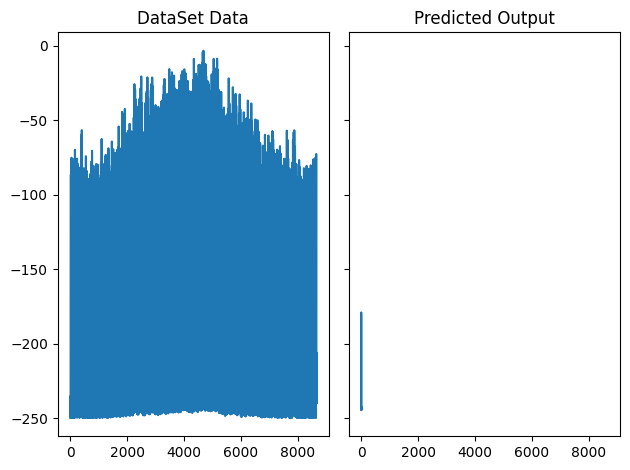


How do you want to get data???

 1 to 14 for Buses and 15. Exit : 10

How many hours prediction you want : 10
Hour  1 Power Consumption :[[18.11781]]
Hour  2 Power Consumption :[[18.238495]]
Hour  3 Power Consumption :[[13.664028]]
Hour  4 Power Consumption :[[8.614217]]
Hour  5 Power Consumption :[[6.0479856]]
Hour  6 Power Consumption :[[4.3920302]]
Hour  7 Power Consumption :[[3.5898976]]
Hour  8 Power Consumption :[[3.1293058]]
Hour  9 Power Consumption :[[3.0692348]]
Hour  10 Power Consumption :[[3.1754277]]


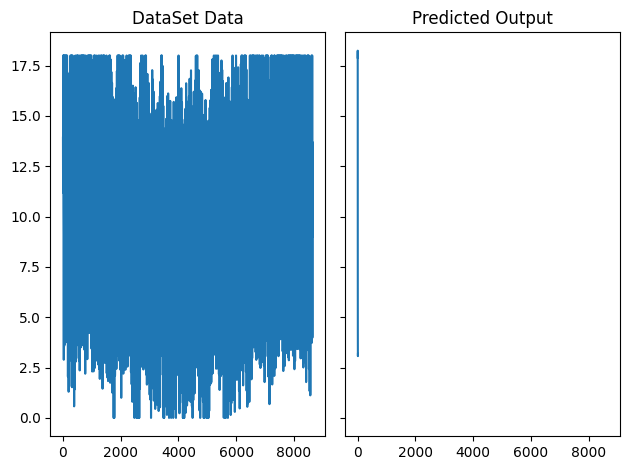


How do you want to get data???

 1 to 14 for Buses and 15. Exit : 5

How many hours prediction you want : 100
Hour  1 Power Consumption :[[14.984516]]
Hour  2 Power Consumption :[[14.8955765]]
Hour  3 Power Consumption :[[11.034568]]
Hour  4 Power Consumption :[[7.2655277]]
Hour  5 Power Consumption :[[5.2853994]]
Hour  6 Power Consumption :[[3.874382]]
Hour  7 Power Consumption :[[3.3325045]]
Hour  8 Power Consumption :[[2.9998186]]
Hour  9 Power Consumption :[[3.1427839]]
Hour  10 Power Consumption :[[3.8997765]]
Hour  11 Power Consumption :[[7.271858]]
Hour  12 Power Consumption :[[10.909505]]
Hour  13 Power Consumption :[[11.44495]]
Hour  14 Power Consumption :[[11.309346]]
Hour  15 Power Consumption :[[8.076893]]
Hour  16 Power Consumption :[[4.4715424]]
Hour  17 Power Consumption :[[2.7116935]]
Hour  18 Power Consumption :[[1.4715041]]
Hour  19 Power Consumption :[[0.9582715]]
Hour  20 Power Consumption :[[0.6826776]]
Hour  21 Power Consumption :[[0.6732358]]
Hour  22 Power Cons

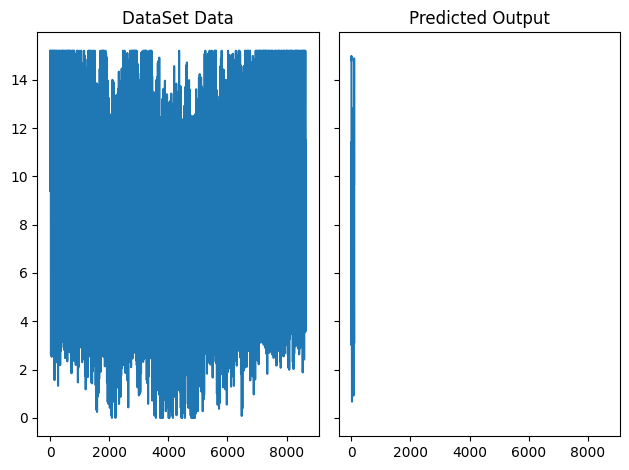


How do you want to get data???

 1 to 14 for Buses and 15. Exit : 15

Thanks Sir...


In [35]:
while True:
    print("\nHow do you want to get data???")
    n = int(input("\n 1 to 14 for Buses and 15. Exit : "))
    
    match n:
        case 1:
            x_input1 = timeseries_data_1[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input1, "Hour", hr, model_1,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_1 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 2:
            x_input2 = timeseries_data_2[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input2, "Hour", hr, model_2,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_2 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 3:
            x_input3 = timeseries_data_3[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input3, "Hour", hr, model_3,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_3 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 4:
            x_input4 = timeseries_data_4[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input4, "Hour", hr, model_4,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_4 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 5:
            x_input5 = timeseries_data_5[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input5, "Hour", hr, model_5,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_5 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 6:
            x_input6 = timeseries_data_6[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input6, "Hour", hr, model_6,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_6 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
            

        case 7:
            x_input7 = timeseries_data_7[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input7, "Hour", hr, model_7,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_7 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
            
        case 8:
            x_input8 = timeseries_data_8[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input8, "Hour", hr, model_8,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_8 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
            
        case 9:
            x_input9 = timeseries_data_9[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input9, "Hour", hr, model_9,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_9 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
            
        case 10:
            x_input10 = timeseries_data_10[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input10, "Hour", hr, model_10,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_10 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
            
        case 11:
            x_input11 = timeseries_data_11[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input11, "Hour", hr, model_11,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_11 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 12:
            x_input12 = timeseries_data_12[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input12, "Hour", hr, model_12,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_12 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 13:
            x_input13 = timeseries_data_13[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input13, "Hour", hr, model_13,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_13 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 14:
            x_input14 = timeseries_data_14[-3:]
            lst_output=[]
            hr = int(input("\nHow many hours prediction you want : "))
            
            prediction(x_input14, "Hour", hr, model_14,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_14 )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        case 15:
            print("\nThanks Sir...")
            break